#### Discussion Related with outliers And impact on machine learning

#### which machine learning model are sensitive to outliers?
1. Naives Bayes classifier----Not sensitive to outliers(sensitive means getting impacted on dataset)
2. SVM-------                 Not sensitive to outliers
3. Linear Regression-----     sensitive to outliers
4. Logistics Regression-----  sensitive to outliers 
5. Decision Tree Regressor or classifier-----Not sensitive to outliers
6. Ensemble(RF,Xgboost,GB)------NOt sensitive to outliers
7. KNN------Not sensitive to outlers
8. K-Means------sensitive to outlier
9. Hierarchal-----sensitive
10. PCA------sensitive 
11. Neaural Networks------sensitive
12. DBSCAN----------------sensitive 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic (3).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

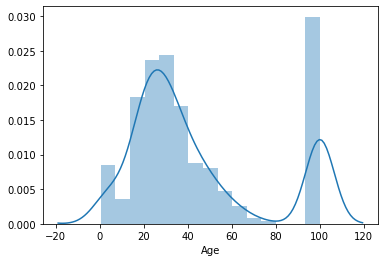

In [5]:
sns.distplot(df['Age'].fillna(100))

#### Gussian Distribution

Text(0, 0.5, 'No of passenger')

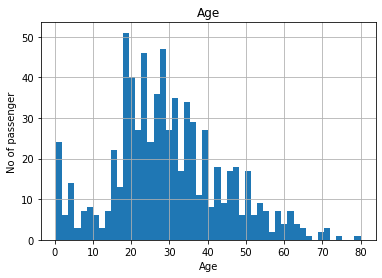

In [6]:
##ploting histogram
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')


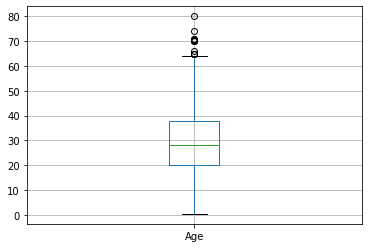

In [7]:
figure=df.boxplot(column='Age')

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### If The data is normally distributed we use below techniques

In [9]:
### Assuming Age follows gaussian distribution we'll calculate the boundaries which differentate the outliers
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print(lower_boundary),print(upper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

### Feature Are skewed we use below techniques

Text(0, 0.5, 'No of passenger')

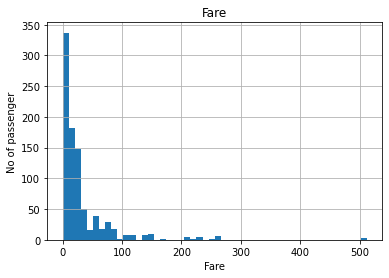

In [10]:
##ploting histogram
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

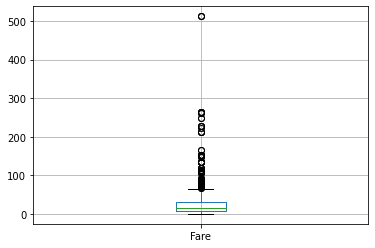

In [11]:
figure=df.boxplot(column='Fare')

In [12]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
### IQR let's compute interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [14]:
IQR

23.0896

In [15]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [16]:
## Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

##### if the feature is right skewed(then do some feature engineering techniques)

In [17]:
##copying the dataset
data=df.copy()

In [18]:
data.loc[data['Age']>73,'Age']=73

In [19]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [20]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

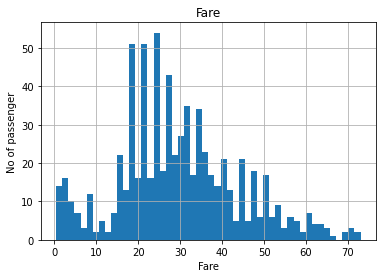

In [21]:
##ploting histogram
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

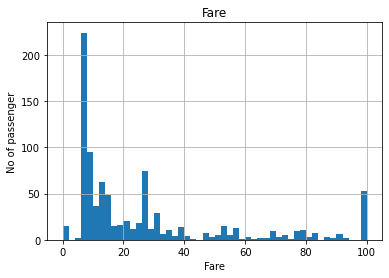

In [22]:
##ploting histogram
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [25]:
#### Logistics Regression
from sklearn.linear_model import LogisticRegression


In [29]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print(f"Accuracy_score {accuracy_score(y_test,y_pred)}")
print(f"Roc_aur_score {roc_auc_score(y_test,y_pred1[:,1])}")

Accuracy_score 0.6529850746268657
Roc_aur_score 0.6922017558960233


In [31]:
## RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print(f"Accuracy_score {accuracy_score(y_test,y_pred)}")
print(f"Roc_aur_score {roc_auc_score(y_test,y_pred1[:,1])}")

Accuracy_score 0.667910447761194
Roc_aur_score 0.7007803982326274
